In [1]:
import numpy as np
import os
import matplotlib
import matplotlib.pyplot as plt
# plt.rc('xtick', labelsize=8)
# plt.rc('ytick', labelsize=8)
# plt.rc('axes', labelsize=8)

import sys
import pathlib

# in jupyter (lab / notebook), based on notebook path
module_path = str(pathlib.Path.cwd().parents[0] / "py")
# # in standard python
# module_path = str(pathlib.Path.cwd(__file__).parents[0] / "common")

if module_path not in sys.path:
    sys.path.append(module_path)

import common.viz

In [2]:
# Compare between experiments in a list
experiment_list = [
    # "sense_t24_random-agent_BC_rsp10",
    # "sense_t24_random-agent_BC_rsp20",
    # "sense_t24_random-agent_BC_rsp30",
    # "sense_t24_random-agent_BC_rsp40",
    # "sense_t24_random-agent_BC_rsp50",
    # "sense_t24_random-agent_BC_rsp60",
    # "sense_t24_random-agent_BC_rsp70",
    # "sense_t24_random-agent_BC_rsp80",
    # "sense_t24_random-agent_BC_rsp90",
    # "sense_t24_random-agent_BC_rsp95",
    # "sense_t24_random-agent_BC_rsp98",
    
    # "sense_t24_random-agent_mBC_rsp10",
    
    # "sense_t24_random-agent_constant_rsp10",
    # "sense_t24_random-agent_constant_rsp20",
    "sense_t24_random-agent_constant_rsp30",
    "sense_t24_random-agent_constant_rsp40",
    "sense_t24_random-agent_constant_rsp50",
    "sense_t24_random-agent_constant_rsp60",
    "sense_t24_random-agent_constant_rsp70",
    # "sense_t24_random-agent_constant_rsp80",
    # "sense_t24_random-agent_constant_rsp90",
    # "sense_t24_random-agent_constant_rsp95",
    # "sense_t24_random-agent_constant_rsp98",
    
    
    # "sense_t24_random-schmitt_aahs",
    # "sense_t24_random-schmitt_ahoy",
    # "sense_t24_random-schmitt_alms",
                    ]
# human readable names for experiments
label_list = [x[17:] for x in experiment_list]
# label_list = [
#     # "BC_rsp10",
#     # "BC_rsp20",
#     # "BC_rsp30",
#     # "BC_rsp40",
#     # "BC_rsp50",
#     # "BC_rsp60",
#     # "BC_rsp70",
#     # "BC_rsp80",
# #     "BC_rsp90",
# #     "BC_rsp95",
# #     "BC_rsp98",
    
# #     "mBC_rsp10",
# #     "mBC_rsp20",
# #     "mBC_rsp30",
# #     "mBC_rsp40",
# #     "mBC_rsp50",
# #     "mBC_rsp60",
# #     "mBC_rsp70",
# #     "mBC_rsp80",
# #     "mBC_rsp90",
# #     "mBC_rsp95",
# #     "mBC_rsp98",
    
#     "constant_rsp10",
#     "constant_rsp20",
#     "constant_rsp30",
#     "constant_rsp40",
#     "constant_rsp50",
#     "constant_rsp60",
#     "constant_rsp70",
#     "constant_rsp80",
#     "constant_rsp90",
#     "constant_rsp95",
#     "constant_rsp98",
    
#     # "aahs",
#     # "abbe",
#     # "abbr",
#     # "abed",
#     # "abet",
#     # "able",
#     # "ably",
#     # "abut",
#     # "acct",
#     # "aced",
#     # "aces",
#     # "ache",
#     # "achy",
#     # "acid",
#     # "aclu",
#     # "acme",
#     # "acne",
#     # "acre",
#     # "acts",
#     # "adam",
#     # "adds",
#     # "adit",
#     # "ados",
#     # "advt",
#     # "aeon",
#     # "aery",
#     # "afar",
#     # "afro",
#     # "agar",
#     # "aged",
#     # "ages",
#     # "agha",
#     # "agin",
#     # "agog",
#     # "ague",
#     # "ahem",
#     # "ahoy",
#     # "aide",
#     # "aids",
#     # "ails",
#     # "aims",
#     # "airs",
#     # "airy",
#     # "ajar",
#     # "akin",
#     # "alai",
#     # "alan",
#     # "alar",
#     # "alas",
#     # "alba",
#     # "albs",
#     # "alee",
#     # "ales",
#     # "alfa",
#     # "alga",
#     # "alii",
#     # "alit",
#     # "alls",
#     # "ally",
#     # "alma",
#     # "alms",
#     # "aloe",
#     # "alps",
#     # "also",
#                 ]
experiment_label = dict(zip(experiment_list, label_list))

# specify a color for each plot
color_list = list(matplotlib.colors.TABLEAU_COLORS.keys())
experiment_color = dict(zip(experiment_list, color_list))

In [3]:
environment_name = experiment_list[0][:16]
agent_type       = experiment_list[0][17:31]

In [4]:
# Indicate which seeds to use to average across
seed_list = [20211229]

In [5]:
# Set mode to train or test
mode = "test"
print(mode)

test


In [6]:
# Load all data in a dictionary 

# dictionary to hold experimental data
results = {}

# load data from each experiment
for experiment in experiment_list:
    results[experiment]={}
    for seed_no in seed_list:
        # Load data of experiment and store in a dictionary
        experiment_instance_tag = experiment + '-' + str(seed_no)
        root_folder = os.path.dirname(os.getcwd())
        exp_results_folder = os.path.join(root_folder,"results", experiment, mode) # folder with results of the experiment
        exp_results_file = os.path.join(exp_results_folder, experiment_instance_tag + '-'+ mode + '.npy') # experiment data file
        exp_result = np.load(exp_results_file,allow_pickle='TRUE').item()
        results[experiment][seed_no] = exp_result # load to dictionary

In [7]:
# Check if each experiment have the same location
location_list = []
for experiment in experiment_list:
    for seed_no in seed_list:
        if location_list: # if dummy_list is not empty
            # check if all experiments have the same location keys
            assert location_list == list(results[experiment][seed_no].keys()), "Locations differ among experiments and/or seeds"
        else: # if dummy_list is empty
            location_list = list(results[experiment][seed_no].keys())        # location_list = list(results[experiment][seed_no].keys())

In [8]:
# Check if each experiment have the same number of years
year_list = []
for experiment in experiment_list:
    for seed_no in seed_list:
        for location in location_list:
            if year_list:
                assert year_list == list(results[experiment][seed_no][location].keys()), "Years differ among experiments/seeds/locations" 
            else:
                year_list = list(results[experiment][seed_no][location].keys())

In [9]:
# Add statistical summary keys to dictionaries
for experiment in experiment_list:
    results[experiment]["minimum"] = {}
    results[experiment]["first_q"] = {}
    results[experiment]["average"] = {}
    results[experiment]["third_q"] = {}
    results[experiment]["maximum"] = {}
    for location in location_list:
        results[experiment]["minimum"][location] = {}
        results[experiment]["first_q"][location] = {}
        results[experiment]["average"][location] = {}
        results[experiment]["third_q"][location] = {}
        results[experiment]["maximum"][location] = {}
        for year in year_list:
            results[experiment]["minimum"][location][year] = {}
            results[experiment]["first_q"][location][year] = {}
            results[experiment]["average"][location][year] = {}
            results[experiment]["third_q"][location][year] = {}
            results[experiment]["maximum"][location][year] = {}

In [10]:
# get min, avg and max downtimes
for experiment in experiment_list:
    for location in location_list:
        for year in year_list:
            dummy = []
            for seed in seed_list:
                dummy.append(results[experiment][seed][location][year]['downtimes'])
            results[experiment]["minimum"][location][year]['downtimes'] = np.min(dummy)
            results[experiment]["first_q"][location][year]['downtimes'] = np.percentile(dummy, 25)
            results[experiment]["average"][location][year]['downtimes'] = np.mean(dummy)
            results[experiment]["third_q"][location][year]['downtimes'] = np.percentile(dummy, 75)
            results[experiment]["maximum"][location][year]['downtimes'] = np.max(dummy)

# get min, avg and max avg_sense_reward
for experiment in experiment_list:
    for location in location_list:
        for year in year_list:
            dummy = []
            for seed in seed_list:
                avgsnsrwd = results[experiment][seed][location][year]['sense_reward_log'].mean()
                results[experiment][seed][location][year]['avg_sense_reward'] = avgsnsrwd # add new entry
                dummy.append(avgsnsrwd)
            results[experiment]["minimum"][location][year]['avg_sense_reward'] = np.min(dummy)
            results[experiment]["first_q"][location][year]['avg_sense_reward'] = np.percentile(dummy, 25)
            results[experiment]["average"][location][year]['avg_sense_reward'] = np.mean(dummy)
            results[experiment]["third_q"][location][year]['avg_sense_reward'] = np.percentile(dummy, 75)
            results[experiment]["maximum"][location][year]['avg_sense_reward'] = np.max(dummy)

# get min, avg and max avg_enp_reward
for experiment in experiment_list:
    for location in location_list:
        for year in year_list:
            dummy = []
            for seed in seed_list:
                avgenprwd = results[experiment][seed][location][year]['enp_reward_log'].mean()
                results[experiment][seed][location][year]['avg_enp_reward'] = avgenprwd # add new entry
                dummy.append(avgenprwd)
            results[experiment]["minimum"][location][year]['avg_enp_reward'] = np.min(dummy)
            results[experiment]["first_q"][location][year]['avg_enp_reward'] = np.percentile(dummy, 25)
            results[experiment]["average"][location][year]['avg_enp_reward'] = np.mean(dummy)
            results[experiment]["third_q"][location][year]['avg_enp_reward'] = np.percentile(dummy, 75)
            results[experiment]["maximum"][location][year]['avg_enp_reward'] = np.max(dummy)

tokyo


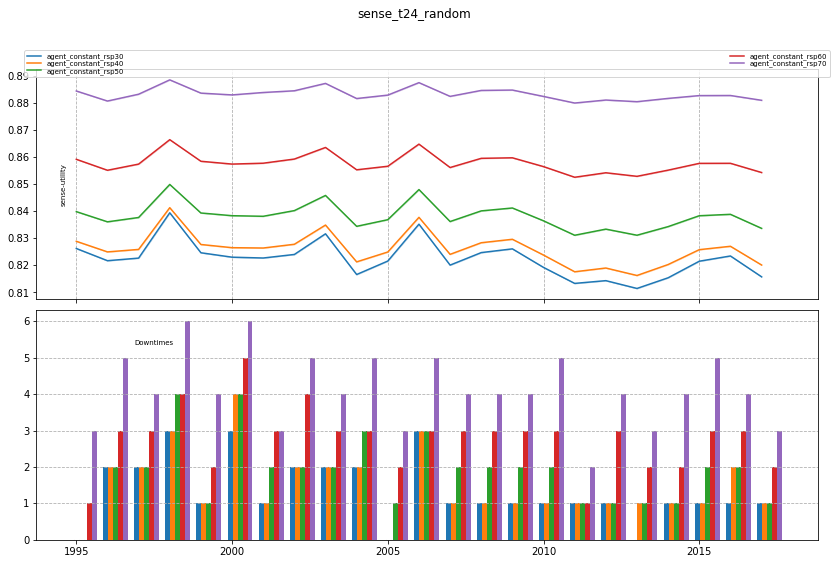

In [11]:
# Downtimes and Sense Rewards

single_column_figure_width = 3.487
double_column_figure_width = 7*2

# fig_width = single_column_figure_width
fig_width = double_column_figure_width
fig_height = fig_width / 1.618

fig, axs = plt.subplots(nrows=2,
                        ncols=1,
                        figsize=[fig_width,fig_height], # in inches
                        sharex=True)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=.05)

#######################################################################################
# # left  = 0.125  # the left side of the subplots of the figure
# # right = 0.9    # the right side of the subplots of the figure
# # bottom = 0.1   # the bottom of the subplots of the figure
# # top = 0.9      # the top of the subplots of the figure
# # wspace = 0.2   # the amount of width reserved for blank space between subplots
# # hspace = 0.2   # the amount of height reserved for white space between subplots
#######################################################################################

sense_reward_ax  = axs[0]
downtimes_ax = axs[1]

location = 'tokyo'
print(location)

# avg_sense_reward
for experiment in experiment_list:
    min_data = [results[experiment]["minimum"][location][year]['avg_sense_reward'] for year in year_list]
    qt1_data = [results[experiment]["first_q"][location][year]['avg_sense_reward'] for year in year_list]
    avg_data = [results[experiment]["average"][location][year]['avg_sense_reward'] for year in year_list]
    qt3_data = [results[experiment]["third_q"][location][year]['avg_sense_reward'] for year in year_list]
    max_data = [results[experiment]["maximum"][location][year]['avg_sense_reward'] for year in year_list]

    
    sense_reward_ax.fill_between(year_list, y1=qt1_data, y2=qt3_data, color=experiment_color[experiment],alpha=0.2)
    sense_reward_ax.plot(year_list, avg_data, 
                         color=experiment_color[experiment], 
                         label=experiment_label[experiment])
    
sense_reward_ax.text(0.035,0.5, 'sense-utility', 
         size='x-small', ha='center', va='center', 
        rotation='vertical',  transform=sense_reward_ax.transAxes)
# sense_reward_ax.set_title('sense utility')
# sense_reward_ax.set_ylabel('sense utility')    
sense_reward_ax.legend(loc="lower left",
                       ncol=2,
                       fontsize='x-small',
                        bbox_to_anchor=(-0.02,0.95,1.04,1),
                        mode="expand",
                       labelspacing=0.1,)
sense_reward_ax.grid(which='major', axis='x', linestyle='--')

# Downtimes
for experiment in experiment_list:
    min_data = [results[experiment]["minimum"][location][year]['downtimes'] for year in year_list]
    qt1_data = [results[experiment]["first_q"][location][year]['downtimes'] for year in year_list]
    avg_data = [results[experiment]["average"][location][year]['downtimes'] for year in year_list]
    qt3_data = [results[experiment]["third_q"][location][year]['downtimes'] for year in year_list]
    max_data = [results[experiment]["maximum"][location][year]['downtimes'] for year in year_list]
    
    width = 0.8/len(experiment_list)  # the width of the bars 
    xroot = np.array(year_list) # label locations
    xoffset = -0.8/2 + experiment_list.index(experiment) 
    # IQR = Q3-Q1 = (Q3-AVG) + (AVG-Q1) So that we can anchor it at the average value
    
    yerr_min = np.array(avg_data) - np.array(qt1_data)
    yerr_max = np.array(qt3_data) - np.array(avg_data)
    downtimes_ax.bar(xroot+xoffset*width, avg_data,width, yerr = [yerr_min, yerr_max], 
                     color=experiment_color[experiment], 
                     label=experiment_label[experiment],
                     error_kw=dict(ecolor='black', lw=1, capsize=0.5, capthick=width*0.5, alpha=0.2))

downtimes_ax.set_xticks(year_list[::5])
downtimes_ax.set_xticklabels(year_list[::5], rotation=0)

downtimes_ax.text(0.15,0.85, 'Downtimes', 
                 size='x-small', ha="center", 
                 transform=downtimes_ax.transAxes)
# downtimes_ax.set_title('downtimes')
# downtimes_ax.set_ylabel('downtimes')    
# downtimes_ax.legend(loc="lower left",
#                    ncol=1,
#                    bbox_to_anchor=(0,0.8,1,1))
downtimes_ax.grid(which='major', axis='y', linestyle='--')


fig.suptitle(environment_name)
fig_tag = environment_name + "-" + agent_type
fig_filename = "../figures/" + fig_tag +".png"
# fig.savefig(fig_filename, dpi=300, bbox_inches='tight', transparent=True)